In [2]:
! pip install mplfinance

In [3]:
import os
from urllib import request
import pandas as pd

def get_bb_log(yyyy, mm, dd, symbol="BTCUSD"):
    file_name = f'{symbol}{yyyy:04d}-{mm:02d}-{dd:02d}.csv.gz'
    tmp_file = '/tmp/'+ file_name

    if not os.path.exists(tmp_file):
        download_url = f'https://public.bybit.com/trading/{symbol}/{file_name}'
        request.urlretrieve(download_url, tmp_file)
        print("download file=", file_name)

    return tmp_file

def get_bb_df(yyyy, mm, dd):
    file = get_bb_log(yyyy, mm, dd)

    bb_df = pd.read_csv(file, index_col=0)
    bb_df.index = pd.to_datetime(bb_df.index*1_000_000_000, utc=True)

    return bb_df


def resample_ohlcv(data, time):
    resample_df = data['price'].resample(time).ohlc()
    resample_df['volume'] = data['size'].resample(time).sum()
    return resample_df

In [4]:
import mplfinance as mpf

df = get_bb_df(2021, 9, 15)
df = df.append(get_bb_df(2021, 9, 16))
df = df.append(get_bb_df(2021, 9, 17))


price = df['price']

download file= BTCUSD2021-09-15.csv.gz
download file= BTCUSD2021-09-16.csv.gz
download file= BTCUSD2021-09-17.csv.gz


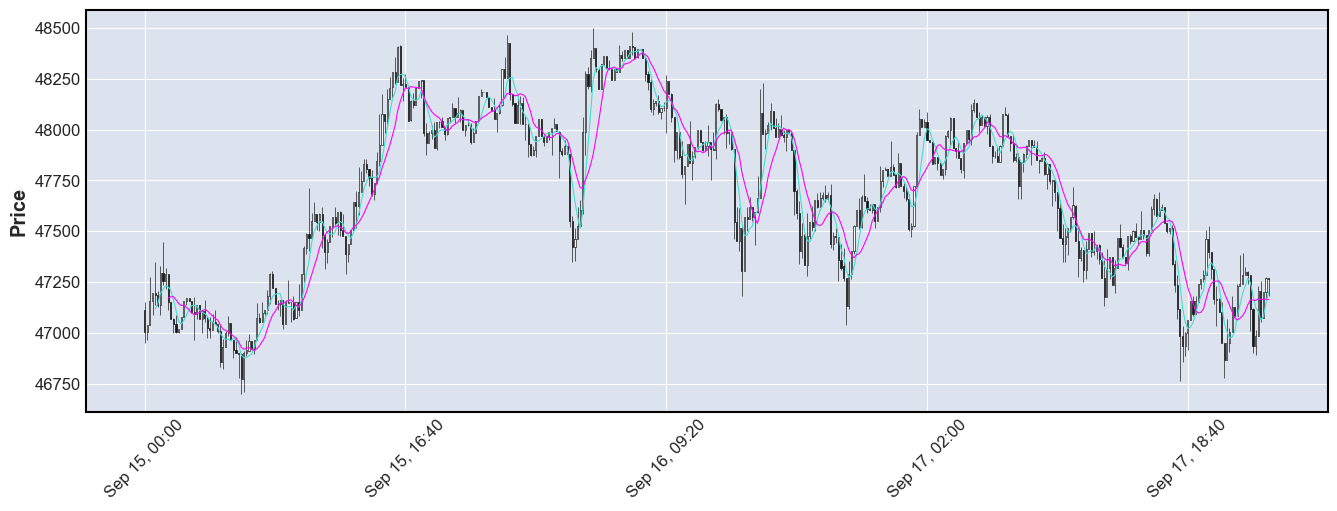

In [9]:
ohlcv_df = resample_ohlcv(df, '10T')


mpf.plot(ohlcv_df, type='candle', figratio=(12,4), mav=(5, 10))


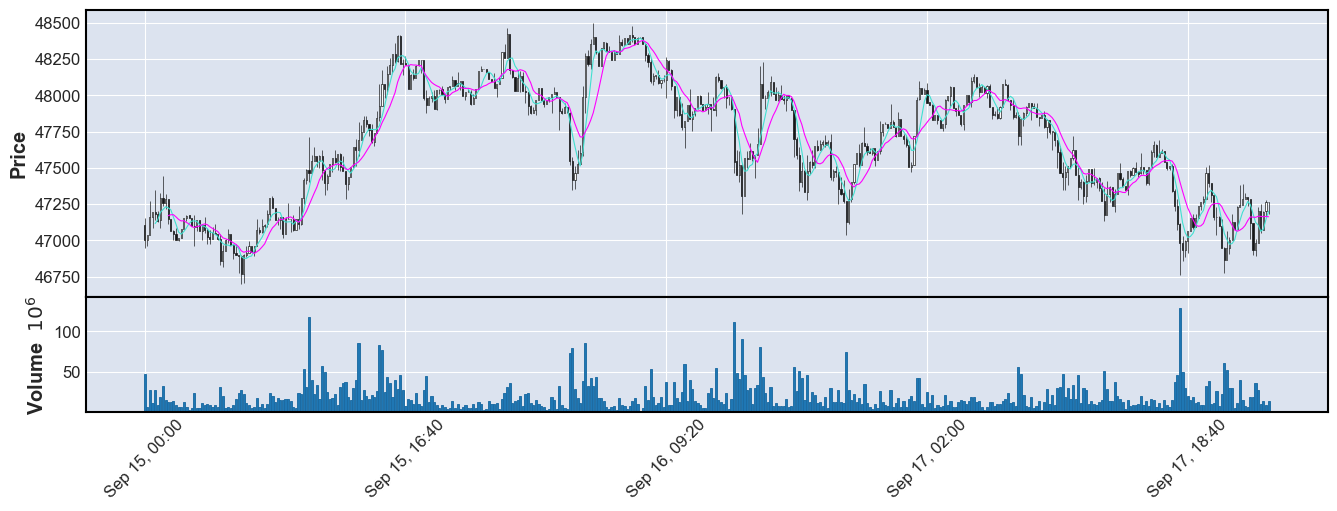

In [10]:
mpf.plot(ohlcv_df, type='candle', figratio=(12,4), mav=(5, 10), volume=True)

